# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
start = datetime(2018,1,1)
end = datetime(2023, 11, 23)

In [7]:
google = yf.Ticker('GOOG')
msft=yf.Ticker('MSFT')
appl=yf.Ticker('AAPL')
amzn=yf.Ticker('AMZN')

In [8]:
google_df = google.history(start=start, end=end)
msft_df = msft.history(start=start, end=end)
appl_df=appl.history(start=start, end=end)
amzn_df=amzn.history(start=start, end=end)

In [9]:
google_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
2018-01-05 00:00:00-05:00,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
2018-01-08 00:00:00-05:00,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [10]:
msft_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,0.0,0.0
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,0.0,0.0
2023-11-20 00:00:00-05:00,371.220001,378.869995,371.000000,377.440002,52465100,0.0,0.0
2023-11-21 00:00:00-05:00,375.670013,376.220001,371.119995,373.070007,28423100,0.0,0.0
2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,0.0,0.0


# 2. Pre-processing

In [51]:
# 选择闭市价
g_close = 100 * google_df[['Close']].dropna() 
ms_close = 100 * msft_df[['Close']].dropna() 
appl_close=100 * appl_df[['Close']].dropna() 
amzn_close=100 * amzn_df[['Close']].dropna() 

### Decomposition

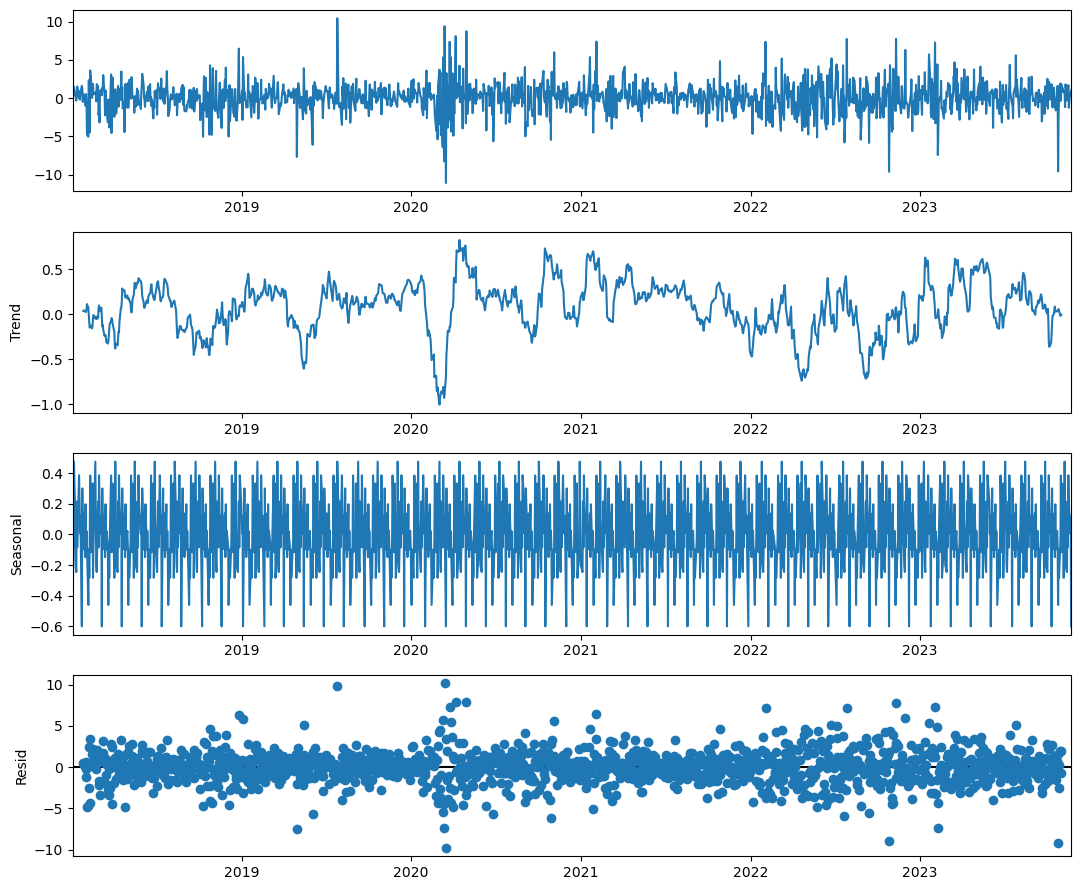

In [13]:
from pylab import rcParams

# Google

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(g_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

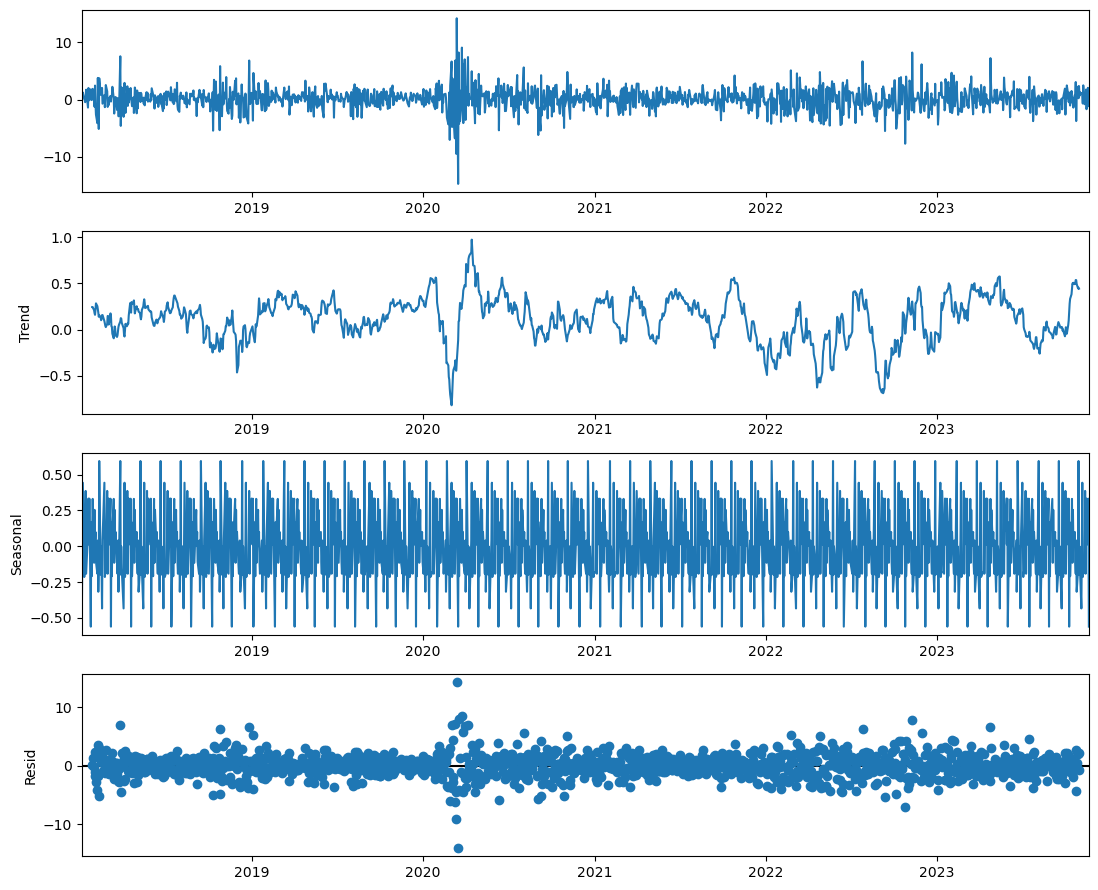

In [14]:
# Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ms_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

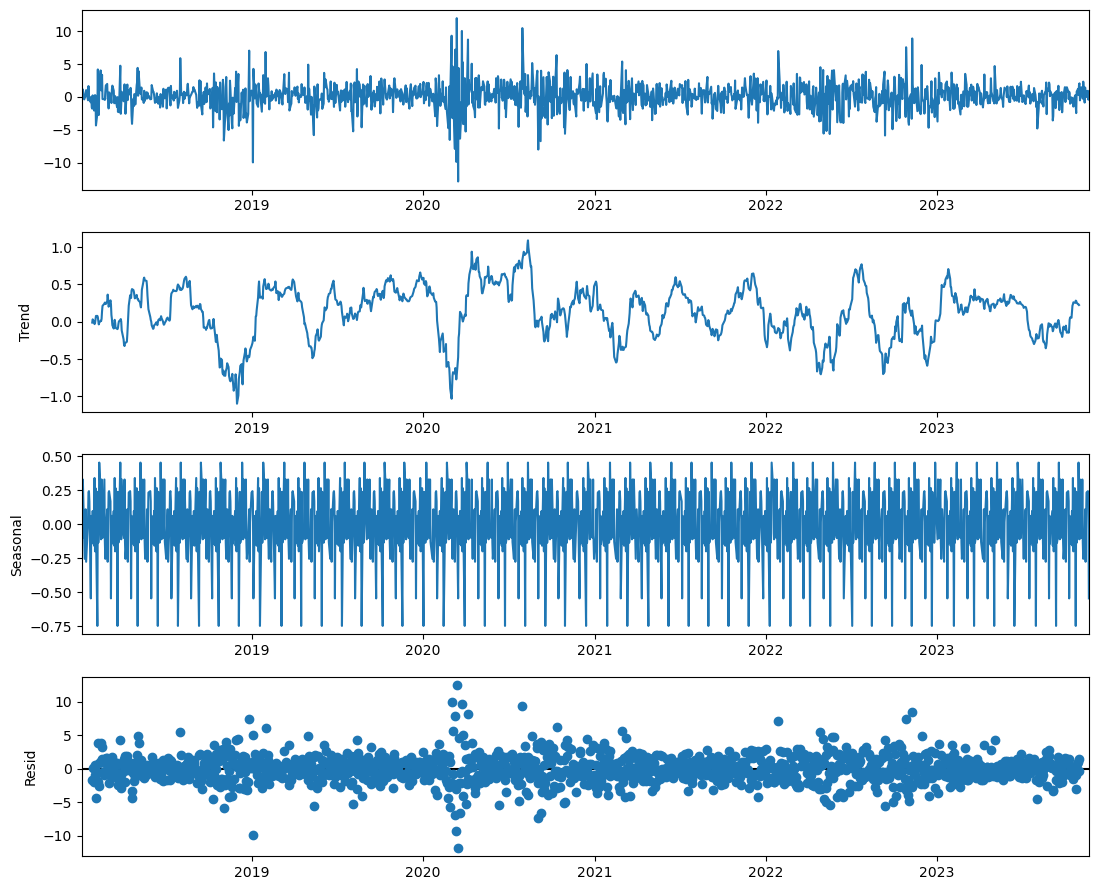

In [15]:
# Apple

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(appl_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

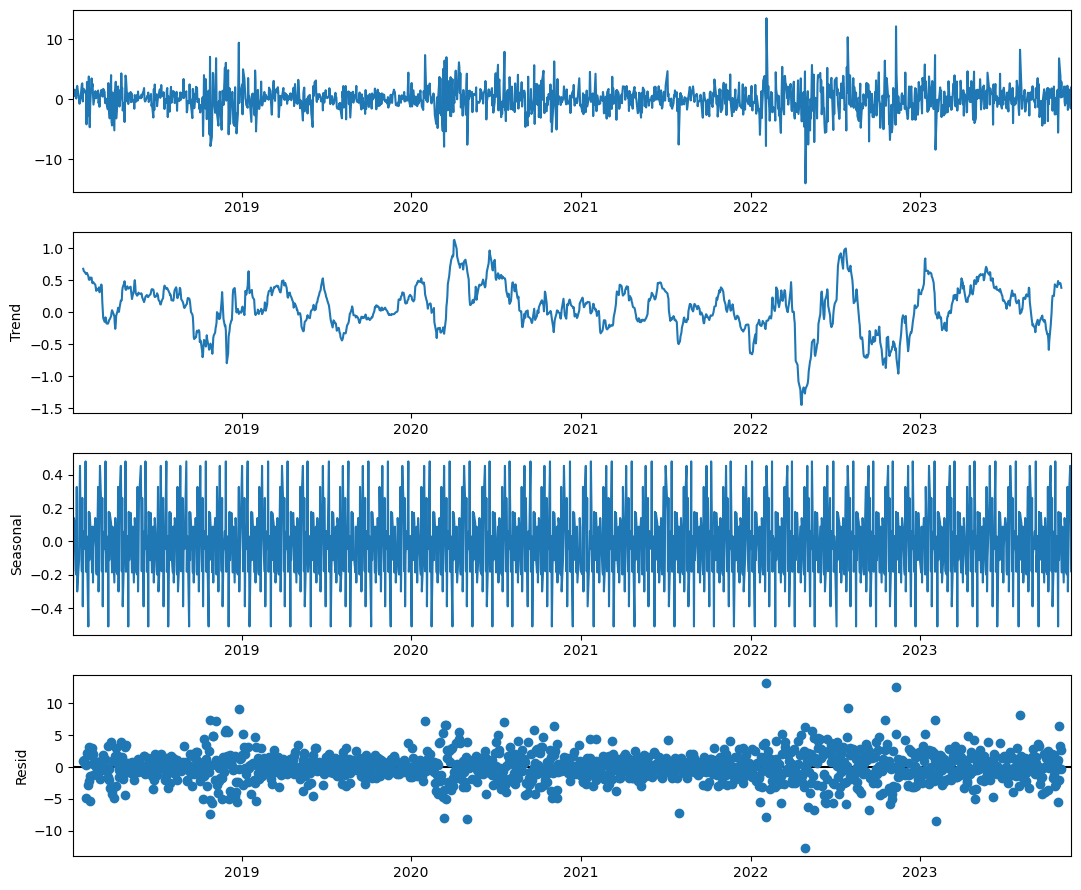

In [16]:
#Amazon

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(amzn_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

### Correlations

In [52]:
df_all = pd.concat([g_close, ms_close, appl_close, amzn_close], axis=1)

df_all.columns = ['Google', 'Microsoft', 'Apple', 'Amazon']

df_all.head()

,Google,Microsoft,Apple,Amazon
Date,,,,
2018-01-02 00:00:00-05:00,5325.000000,8022.901154,4072.287750,5945.050049
2018-01-03 00:00:00-05:00,5412.400055,8060.237885,4071.578217,6020.999908
2018-01-04 00:00:00-05:00,5431.999969,8131.180573,4090.489960,6047.949982
2018-01-05 00:00:00-05:00,5511.149979,8231.990814,4137.062836,6145.700073
2018-01-08 00:00:00-05:00,5534.700012,8240.391541,4121.696091,6234.349823


Text(0.5, 1.0, 'Correlation of stock close price')

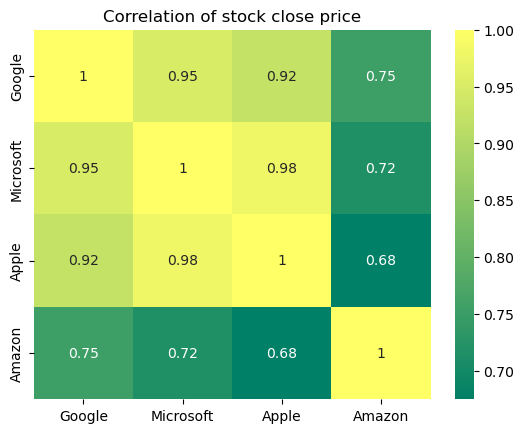

In [107]:
import seaborn as sns
plt.figure()
sns.heatmap(df_all.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock close price')

## Stationarity Check

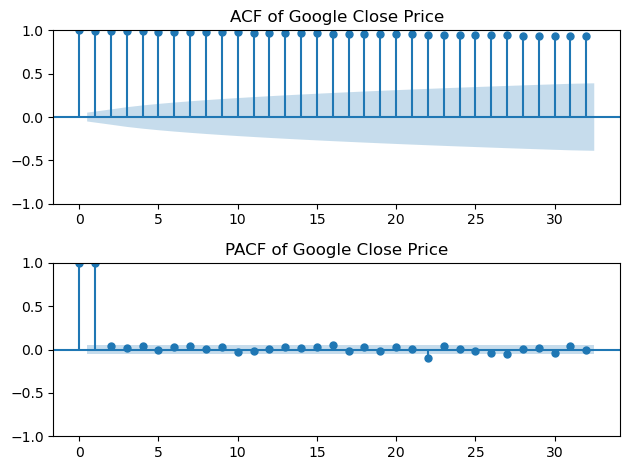

In [54]:
fig, axs = plt.subplots(2)

plot_acf(g_close, ax=axs[0])
axs[0].set_title('ACF of Google Close Price')
plot_pacf(g_close, ax=axs[1])
axs[1].set_title('PACF of Google Close Price')

plt.tight_layout()
plt.show()

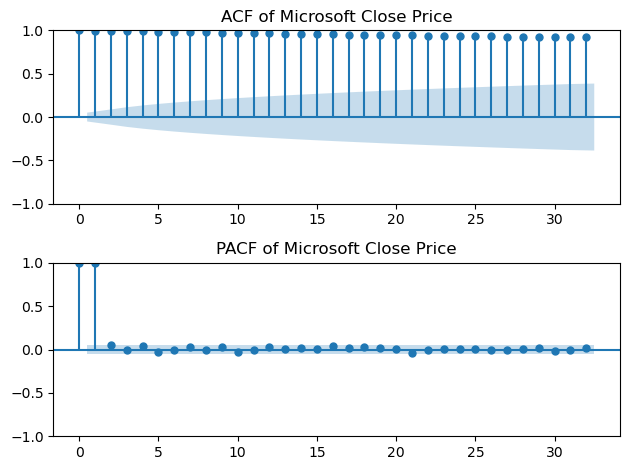

In [108]:
fig, axs = plt.subplots(2)

plot_acf(ms_close, ax=axs[0])
axs[0].set_title('ACF of Microsoft Close Price')
plot_pacf(ms_close, ax=axs[1])
axs[1].set_title('PACF of Microsoft Close Price')

plt.tight_layout()
plt.show()

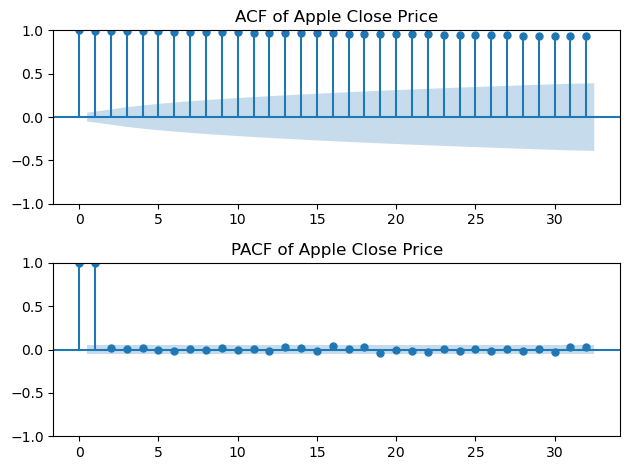

In [109]:
fig, axs = plt.subplots(2)

plot_acf(appl_close, ax=axs[0])
axs[0].set_title('ACF of Apple Close Price')
plot_pacf(appl_close, ax=axs[1])
axs[1].set_title('PACF of Apple Close Price')

plt.tight_layout()
plt.show()

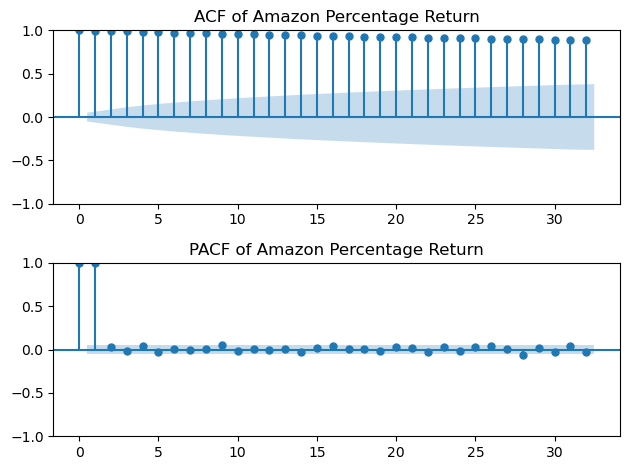

In [110]:
fig, axs = plt.subplots(2)

plot_acf(amzn_close, ax=axs[0])
axs[0].set_title('ACF of Amazon Percentage Return')
plot_pacf(amzn_close, ax=axs[1])
axs[1].set_title('PACF of Amazon Percentage Return')

plt.tight_layout()
plt.show()

### Transform them to stationary

In [59]:
g_diff = g_close.diff().dropna()
ms_diff = ms_close.diff().dropna()
amzn_diff = amzn_close.diff().dropna()
appl_diff = appl_close.diff().dropna()

### The Augmented Dickey-Fuller test

In [60]:
from statsmodels.tsa.stattools import adfuller

goo_adftest = adfuller(g_diff)
goo_adf_results= pd.Series(goo_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in goo_adftest[4].items():
    goo_adf_results['Critical Value (%s)'%key] = value
goo_adf_results

Test Statistic                  -40.032481
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1482.000000
Critical Value (1%)              -3.434770
Critical Value (5%)              -2.863492
Critical Value (10%)             -2.567809
dtype: float64

In [61]:
from statsmodels.tsa.stattools import adfuller

ms_adftest = adfuller(ms_diff)
ms_adf_results= pd.Series(ms_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in ms_adftest[4].items():
    ms_adf_results['Critical Value (%s)'%key] = value
ms_adf_results

Test Statistic                -1.256735e+01
p-value                        2.039693e-23
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [62]:
from statsmodels.tsa.stattools import adfuller

amzn_adftest = adfuller(amzn_diff)
amzn_adf_results= pd.Series(amzn_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in amzn_adftest[4].items():
    amzn_adf_results['Critical Value (%s)'%key] = value
amzn_adf_results

Test Statistic                  -39.501332
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1482.000000
Critical Value (1%)              -3.434770
Critical Value (5%)              -2.863492
Critical Value (10%)             -2.567809
dtype: float64

In [64]:
appl_adftest = adfuller(appl_diff)
appl_adf_results= pd.Series(appl_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in appl_adftest[4].items():
    appl_adf_results['Critical Value (%s)'%key] = value
appl_adf_results

Test Statistic                  -39.921415
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1482.000000
Critical Value (1%)              -3.434770
Critical Value (5%)              -2.863492
Critical Value (10%)             -2.567809
dtype: float64

In [31]:
# Reject all H0, unit root doesn't exists. All stationary(trend-stationary).

# 3. Fit VAR model

In [65]:
# Train (90%) & Test (10%) Split

nobs = round(0.1*len(df_all))
train, test = df_all[0:-nobs], df_all[-nobs:]

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1336 entries, 2018-01-02 00:00:00-05:00 to 2023-04-24 00:00:00-04:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     1336 non-null   float64
 1   Microsoft  1336 non-null   float64
 2   Apple      1336 non-null   float64
 3   Amazon     1336 non-null   float64
dtypes: float64(4)
memory usage: 52.2 KB


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2023-04-25 00:00:00-04:00 to 2023-11-22 00:00:00-05:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     148 non-null    float64
 1   Microsoft  148 non-null    float64
 2   Apple      148 non-null    float64
 3   Amazon     148 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [68]:
model = VAR(df_all)
aic=[]
for i in range(30):
    result = model.fit(i)
    aic.append(result.aic)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    


Lag Order = 0
AIC :  61.03403561677168
BIC :  61.04832805996232
FPE :  3.211773252553166e+26
HQIC:  61.03936292817625 

Lag Order = 1
AIC :  42.119879493772714
BIC :  42.191380806545986
FPE :  1.960790919261835e+18
HQIC:  42.146531522172175 

Lag Order = 2
AIC :  42.11913366614983
BIC :  42.247906487344714
FPE :  1.9593300224260756e+18
HQIC:  42.16713519988943 

Lag Order = 3
AIC :  42.131876656637935
BIC :  42.317983737219926
FPE :  1.9844598999312717e+18
HQIC:  42.20125252967913 

Lag Order = 4
AIC :  42.128946542511166
BIC :  42.3724507458487
FPE :  1.9786581448199642e+18
HQIC:  42.21972163454599 

Lag Order = 5
AIC :  42.13791827869837
BIC :  42.438882580840165
FPE :  1.9964971882901384e+18
HQIC:  42.250117515264165 

Lag Order = 6
AIC :  42.146915670011424
BIC :  42.505403159964615
FPE :  2.014552131717096e+18
HQIC:  42.28056402260591 

Lag Order = 7
AIC :  42.15342521979489
BIC :  42.569499099804126
FPE :  2.0277235000247693e+18
HQIC:  42.30854770599166 

Lag Order = 8
AIC :  42.

In [69]:
aic.sort()
aic

[42.11913366614983,
 42.119879493772714,
 42.128946542511166,
 42.131876656637935,
 42.13791827869837,
 42.14565705815328,
 42.146915670011424,
 42.15145221661568,
 42.152385119414454,
 42.15342521979489,
 42.16726262852454,
 42.174926791776166,
 42.1902750370079,
 42.19454333370097,
 42.19884704549494,
 42.2132982618146,
 42.213663774624514,
 42.22465613618328,
 42.22700508523055,
 42.22762109161301,
 42.23466141314994,
 42.23616814472037,
 42.242987727771805,
 42.25295223475939,
 42.262523989299254,
 42.26406200334363,
 42.27142445035142,
 42.27601715328135,
 42.2878482683655,
 61.03403561677168]

In [37]:
# lag=2时有最小的AIC

In [70]:
# According to AIC check, the explicitly computed AIC is the lowest at lag 1.

model = VAR(train)
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Nov, 2023
Time:                     12:27:02
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    41.8263
Nobs:                     1334.00    HQIC:                   41.7386
Log likelihood:          -35340.0    FPE:                1.27062e+18
AIC:                      41.6860    Det(Omega_mle):     1.23690e+18
--------------------------------------------------------------------
Results for equation Google
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                3.522469        18.696876            0.188           0.851
L1.Google            0.973770         0.046326           21.020           0.000
L1.Microsoft        -0.012424         0.024150           -0.514

## Granger Casuality Check

In [39]:
# As the data is stationary, so we can now conduct Granger Casuality Check

In [30]:
from statsmodels.tsa.stattools import grangercausalitytests

In [114]:
for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            print(f"\nGranger Causality test for {df_all.columns[j]} caused by {df_all.columns[i]}:")
            grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30)



Granger Causality test for Microsoft caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1816  , p=0.2772  , df_denom=1480, df_num=1
ssr based chi2 test:   chi2=1.1840  , p=0.2765  , df=1
likelihood ratio test: chi2=1.1835  , p=0.2766  , df=1
parameter F test:         F=1.1816  , p=0.2772  , df_denom=1480, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4680  , p=0.2307  , df_denom=1477, df_num=2
ssr based chi2 test:   chi2=2.9459  , p=0.2292  , df=2
likelihood ratio test: chi2=2.9430  , p=0.2296  , df=2
parameter F test:         F=1.4680  , p=0.2307  , df_denom=1477, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1145  , p=0.3420  , df_denom=1474, df_num=3
ssr based chi2 test:   chi2=3.3593  , p=0.3395  , df=3
likelihood ratio test: chi2=3.3555  , p=0.3400  , df=3
parameter F test:         F=1.1145  , p=0.3420  , df_denom=1474, df_num=3

Granger Causality
number of lag


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1837  , p=0.6683  , df_denom=1480, df_num=1
ssr based chi2 test:   chi2=0.1841  , p=0.6679  , df=1
likelihood ratio test: chi2=0.1841  , p=0.6679  , df=1
parameter F test:         F=0.1837  , p=0.6683  , df_denom=1480, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1370  , p=0.8720  , df_denom=1477, df_num=2
ssr based chi2 test:   chi2=0.2748  , p=0.8716  , df=2
likelihood ratio test: chi2=0.2748  , p=0.8716  , df=2
parameter F test:         F=0.1370  , p=0.8720  , df_denom=1477, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3034  , p=0.8230  , df_denom=1474, df_num=3
ssr based chi2 test:   chi2=0.9145  , p=0.8219  , df=3
likelihood ratio test: chi2=0.9142  , p=0.8220  , df=3
parameter F test:         F=0.3034  , p=0.8230  , df_denom=1474, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3419  , p=0.

ssr based F test:         F=2.5316  , p=0.0005  , df_denom=1432, df_num=17
ssr based chi2 test:   chi2=44.0884 , p=0.0003  , df=17
likelihood ratio test: chi2=43.4388 , p=0.0004  , df=17
parameter F test:         F=2.5316  , p=0.0005  , df_denom=1432, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=2.4500  , p=0.0006  , df_denom=1429, df_num=18
ssr based chi2 test:   chi2=45.2425 , p=0.0004  , df=18
likelihood ratio test: chi2=44.5584 , p=0.0005  , df=18
parameter F test:         F=2.4500  , p=0.0006  , df_denom=1429, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=2.5930  , p=0.0002  , df_denom=1426, df_num=19
ssr based chi2 test:   chi2=50.6135 , p=0.0001  , df=19
likelihood ratio test: chi2=49.7588 , p=0.0001  , df=19
parameter F test:         F=2.5930  , p=0.0002  , df_denom=1426, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=2.4729  , p=0.0003  , df_denom=1423, df_num=2

ssr based F test:         F=2.0553  , p=0.0012  , df_denom=1402, df_num=27
ssr based chi2 test:   chi2=57.6708 , p=0.0005  , df=27
likelihood ratio test: chi2=56.5587 , p=0.0007  , df=27
parameter F test:         F=2.0553  , p=0.0012  , df_denom=1402, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=2.0096  , p=0.0014  , df_denom=1399, df_num=28
ssr based chi2 test:   chi2=58.5623 , p=0.0006  , df=28
likelihood ratio test: chi2=57.4153 , p=0.0009  , df=28
parameter F test:         F=2.0096  , p=0.0014  , df_denom=1399, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=2.0298  , p=0.0010  , df_denom=1396, df_num=29
ssr based chi2 test:   chi2=61.3526 , p=0.0004  , df=29
likelihood ratio test: chi2=60.0943 , p=0.0006  , df=29
parameter F test:         F=2.0298  , p=0.0010  , df_denom=1396, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=2.0101  , p=0.0010  , df_denom=1393, df_num=3

parameter F test:         F=1.7936  , p=0.0391  , df_denom=1444, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.9553  , p=0.0180  , df_denom=1441, df_num=14
ssr based chi2 test:   chi2=27.9252 , p=0.0146  , df=14
likelihood ratio test: chi2=27.6632 , p=0.0158  , df=14
parameter F test:         F=1.9553  , p=0.0180  , df_denom=1441, df_num=14

Granger Causality
number of lags (no zero) 15
ssr based F test:         F=2.4531  , p=0.0015  , df_denom=1438, df_num=15
ssr based chi2 test:   chi2=37.5899 , p=0.0010  , df=15
likelihood ratio test: chi2=37.1170 , p=0.0012  , df=15
parameter F test:         F=2.4531  , p=0.0015  , df_denom=1438, df_num=15

Granger Causality
number of lags (no zero) 16
ssr based F test:         F=2.4393  , p=0.0012  , df_denom=1435, df_num=16
ssr based chi2 test:   chi2=39.9257 , p=0.0008  , df=16
likelihood ratio test: chi2=39.3924 , p=0.0010  , df=16
parameter F test:         F=2.4393  , p=0.0012  , df_denom=1435, df_num=1

ssr based F test:         F=1.1498  , p=0.2799  , df_denom=1411, df_num=24
ssr based chi2 test:   chi2=28.5533 , p=0.2374  , df=24
likelihood ratio test: chi2=28.2776 , p=0.2485  , df=24
parameter F test:         F=1.1498  , p=0.2799  , df_denom=1411, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.2272  , p=0.2027  , df_denom=1408, df_num=25
ssr based chi2 test:   chi2=31.7901 , p=0.1642  , df=25
likelihood ratio test: chi2=31.4487 , p=0.1746  , df=25
parameter F test:         F=1.2272  , p=0.2027  , df_denom=1408, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.1836  , p=0.2396  , df_denom=1405, df_num=26
ssr based chi2 test:   chi2=31.9345 , p=0.1953  , df=26
likelihood ratio test: chi2=31.5898 , p=0.2070  , df=26
parameter F test:         F=1.1836  , p=0.2396  , df_denom=1405, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.1485  , p=0.2734  , df_denom=1402, df_num=2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0294  , p=0.8638  , df_denom=1480, df_num=1
ssr based chi2 test:   chi2=0.0295  , p=0.8637  , df=1
likelihood ratio test: chi2=0.0295  , p=0.8637  , df=1
parameter F test:         F=0.0294  , p=0.8638  , df_denom=1480, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6238  , p=0.0729  , df_denom=1477, df_num=2
ssr based chi2 test:   chi2=5.2653  , p=0.0719  , df=2
likelihood ratio test: chi2=5.2559  , p=0.0722  , df=2
parameter F test:         F=2.6238  , p=0.0729  , df_denom=1477, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0801  , p=0.1010  , df_denom=1474, df_num=3
ssr based chi2 test:   chi2=6.2699  , p=0.0992  , df=3
likelihood ratio test: chi2=6.2566  , p=0.0998  , df=3
parameter F test:         F=2.0801  , p=0.1010  , df_denom=1474, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2300  , p=0.

ssr based F test:         F=1.2435  , p=0.2268  , df_denom=1435, df_num=16
ssr based chi2 test:   chi2=20.3541 , p=0.2047  , df=16
likelihood ratio test: chi2=20.2143 , p=0.2107  , df=16
parameter F test:         F=1.2435  , p=0.2268  , df_denom=1435, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=1.3116  , p=0.1756  , df_denom=1432, df_num=17
ssr based chi2 test:   chi2=22.8426 , p=0.1544  , df=17
likelihood ratio test: chi2=22.6666 , p=0.1604  , df=17
parameter F test:         F=1.3116  , p=0.1756  , df_denom=1432, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=1.4242  , p=0.1105  , df_denom=1429, df_num=18
ssr based chi2 test:   chi2=26.2998 , p=0.0931  , df=18
likelihood ratio test: chi2=26.0667 , p=0.0982  , df=18
parameter F test:         F=1.4242  , p=0.1105  , df_denom=1429, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=1.4170  , p=0.1087  , df_denom=1426, df_num=1

ssr based F test:         F=1.3517  , p=0.1192  , df_denom=1411, df_num=24
ssr based chi2 test:   chi2=33.5669 , p=0.0927  , df=24
likelihood ratio test: chi2=33.1868 , p=0.1002  , df=24
parameter F test:         F=1.3517  , p=0.1192  , df_denom=1411, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.3219  , p=0.1328  , df_denom=1408, df_num=25
ssr based chi2 test:   chi2=34.2437 , p=0.1028  , df=25
likelihood ratio test: chi2=33.8480 , p=0.1112  , df=25
parameter F test:         F=1.3219  , p=0.1328  , df_denom=1408, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.2760  , p=0.1601  , df_denom=1405, df_num=26
ssr based chi2 test:   chi2=34.4265 , p=0.1246  , df=26
likelihood ratio test: chi2=34.0263 , p=0.1344  , df=26
parameter F test:         F=1.2760  , p=0.1601  , df_denom=1405, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.2248  , p=0.1978  , df_denom=1402, df_num=2

In [112]:
results_df = pd.DataFrame(columns=df_all.columns, index=df_all.columns)

for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            
            test_result=grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30, verbose=False)
            
            # Get the p-value of the F-test for the last lag
            p_value = test_result[2][0]['ssr_ftest'][1]
            
            # If the p-value is less than 0.05, we reject the null hypothesis and conclude that
            # the column variable Granger-causes the index variable
            results_df.loc[df_all.columns[j], df_all.columns[i]] = p_value < 0.05

print(results_df)

          Google Microsoft  Apple Amazon
Google       NaN      True  False  False
Microsoft  False       NaN  False  False
Apple      False      True    NaN  False
Amazon     False     False  False    NaN


### DW-Test of the residuals

In [113]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
for col, val in zip(train.columns, out):
    print(col, ':', round(val, 4))


Google : 2.0078
Microsoft : 2.0084
Apple : 2.0025
Amazon : 1.9969


# 4. Forecast

## Simple Forecast

In [102]:
lag_order = model_fitted.k_ar
print(lag_order)

2


In [103]:
forecast_input = train.values[-lag_order:]
forecast_input

array([[13791.99981689, 37744.00024414, 19144.99969482, 14613.00048828],
       [13861.99951172, 37307.00073242, 19063.99993896, 14389.99938965]])

In [104]:
# Forecast
fore = model_fitted.forecast(y=forecast_input, steps=nobs)
forecast = pd.DataFrame(fore, index=df_all.index[-nobs:], columns=test.columns )
forecast

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,13897.592026,37389.176161,19122.831297,14427.414374
2023-04-26 00:00:00-04:00,13929.190650,37441.608398,19181.742215,14474.931110
2023-04-27 00:00:00-04:00,13961.075573,37496.363087,19240.359953,14521.290051
2023-04-28 00:00:00-04:00,13992.600112,37550.282150,19298.340527,14566.892465
2023-05-01 00:00:00-04:00,14023.833801,37603.697710,19355.731409,14611.747172
...,...,...,...,...
2023-11-16 00:00:00-05:00,16454.872410,42029.242046,23712.196906,16624.868509
2023-11-17 00:00:00-05:00,16464.225214,42050.579073,23729.026679,16624.376189
2023-11-20 00:00:00-05:00,16473.522113,42071.870436,23745.765281,16623.814201


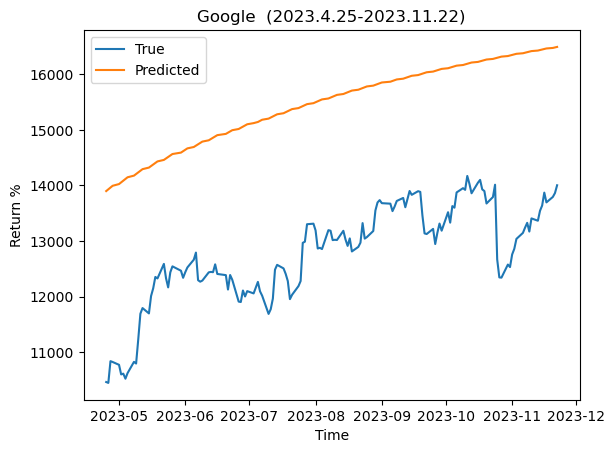

In [105]:
plt.plot(test['Google'], label='True')
plt.plot(forecast['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

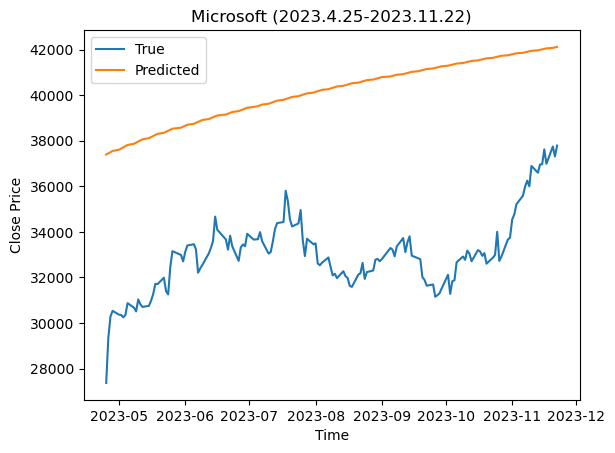

In [106]:
plt.plot(test['Microsoft'], label='True')
plt.plot(forecast['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

### Calculate the accuracy

In [77]:
def forecast_accuracy(forecast, actual):
    
    mse =np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  

    return({'mse':mse,'rmse':rmse})

In [79]:
print('Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(forecast['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(forecast['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Google
mse :  5278628.8038
rmse :  2297.5267

Forecast Accuracy of: Microsoft
mse :  28480264.5918
rmse :  5336.6904


## Rolling Forecast

In [90]:
rolling_predictions = pd.DataFrame()
test_size = 148

for i in range(test_size):
    train = df_all[:-(test_size-i)]  
    
    forecast_input = train.values[-2:]
    
    model = VAR(train)
    model_fitted = model.fit(2)
    pred = model_fitted.forecast(y=forecast_input, steps=1)
    forecast = pd.DataFrame(pred, columns=df_all.columns )
    rolling_predictions = rolling_predictions.append(forecast)

In [91]:
rolling_predictions.index = test.index
rolling_predictions

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,10681.288511,28005.520801,16455.435070,10596.249950
2023-04-26 00:00:00-04:00,10469.393743,27420.026069,16309.447176,10254.694251
2023-04-27 00:00:00-04:00,10428.493267,29273.008879,16360.915945,10596.144914
2023-04-28 00:00:00-04:00,10824.464748,30209.625331,16777.211249,10981.751342
2023-05-01 00:00:00-04:00,10818.974860,30547.899989,16913.041962,10571.142351
...,...,...,...,...
2023-11-16 00:00:00-05:00,13661.017675,37005.477236,18854.051877,14358.288050
2023-11-17 00:00:00-05:00,13890.357898,37615.348600,19026.232785,14327.060515
2023-11-20 00:00:00-05:00,13743.887717,37112.797483,19039.325872,14571.149042


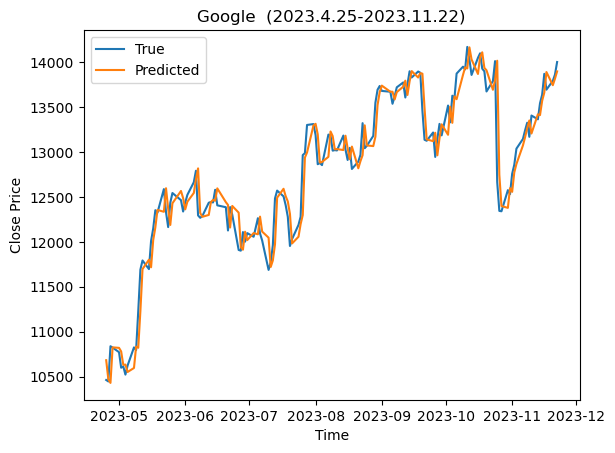

In [92]:
plt.plot(test['Google'], label='True')
plt.plot(rolling_predictions['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

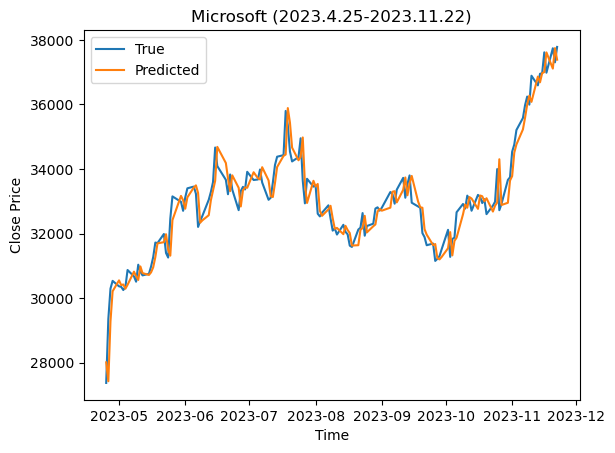

In [100]:
plt.plot(test['Microsoft'], label='True')
plt.plot(rolling_predictions['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

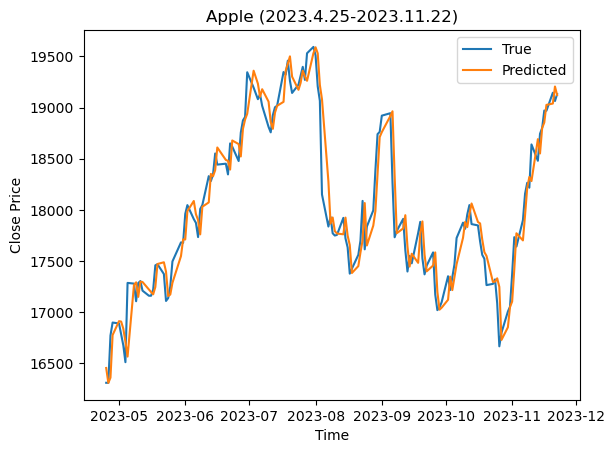

In [99]:
plt.plot(test['Apple'], label='True')
plt.plot(rolling_predictions['Apple'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Apple (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

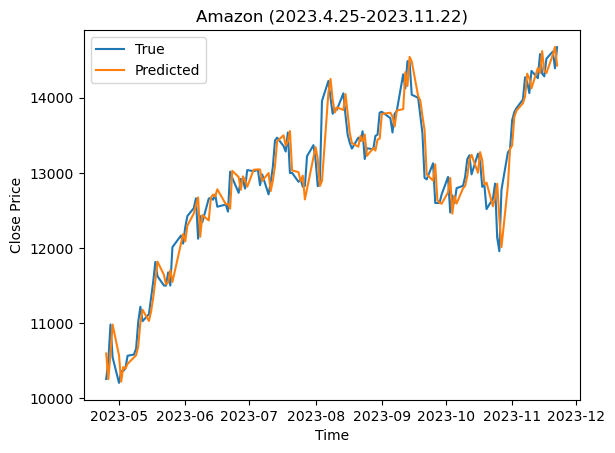

In [98]:
plt.plot(test['Amazon'], label='True')
plt.plot(rolling_predictions['Amazon'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Amazon (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

In [96]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = forecast_accuracy(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = forecast_accuracy(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    
    

Rolling Forecast Accuracy of: Google
mse :  49892.1138
rmse :  223.3654

 Rolling Forecast Accuracy of: Microsoft
mse :  253781.9221
rmse :  503.7677

 Rolling Forecast Accuracy of: Apple
mse :  48839.5589
rmse :  220.9967

 Rolling Forecast Accuracy of: Amazon
mse :  66114.5938
rmse :  257.1276


In [97]:
# 这个最好放到ppt上

df_all.describe()

,Google,Microsoft,Apple,Amazon
count,1484.000000,1484.000000,1484.000000,1484.000000
mean,9077.590825,20627.371631,10741.777362,11957.992046
std,3157.245029,8216.177303,5064.900533,3346.916609
min,4881.100082,7935.157013,3411.887741,5945.050049
25%,5967.162514,12834.275436,5152.582741,9039.800072
50%,8761.474991,21239.101410,12007.173538,11290.500259
75%,11977.387428,27609.210968,14998.161697,15479.724884
max,15070.899963,37785.000610,19592.695618,18657.049561
